In [1]:
import numpy as np
import pandas as pd
import os
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt
import subprocess
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, average_precision_score

import sys
sys.path.append('/home/hxcai/cell_type_specific_CRE/')
from utils import *

mpl_params = {
    # 图像参数
    'figure.dpi': 100,
    'figure.figsize': (6, 4.5),
}
plt.rcParams.update(mpl_params)

In [2]:
# def change_config(load_dir, save_dir, key, value):
#     with open(load_dir, 'r') as f:
#         # config = yaml.safe_load(f)
#         config = yaml.load(f, Loader=yaml.FullLoader)
#         config[key] = value

#     if save_dir is not None:
#         with open(save_dir, 'w') as f:
#             yaml.dump(config, f)


# config_path_valid = config_path.replace('config.yaml', 'config_valid.yaml')
# change_config(config_path, config_path_valid, 'selected_valid_datasets_idx', [0,1,2,3])

In [3]:
python_path = 'train_0514_valid.py'
saved_dir = 'saved/0531_GosaiMPRA_baseline/0531_164123'
config_path = f'{saved_dir}/config_test.yaml'

In [4]:
subprocess.run(
    f'python {python_path} --config_path {config_path}', 
    shell=True)

2024-06-07 17:11:19,089 - INFO - Start non-distributed training on rank 0, cuda:0.
2024-06-07 17:11:19,190 - INFO - len(test_dataset) = 76168
2024-06-07 17:11:19,190 - INFO - len(test_loader) = 38
2024-06-07 17:11:19,208 - INFO - load saved model from saved/0531_GosaiMPRA_baseline/0531_164123/checkpoints/checkpoint.pth


100%|██████████| 38/38 [00:04<00:00,  8.40it/s]


CompletedProcess(args='python train_0514_valid.py --config_path saved/0531_GosaiMPRA_baseline/0531_164123/config_test.yaml', returncode=0)

In [5]:
# y_pred_list = np.load(f'{saved_dir}/y_pred_list.npy')
# print(y_pred_list.shape)

# cell_types = ['HepG2', 'K562', 'SKNSH']
# main_df = pd.read_csv('/home/hxcai/cell_type_specific_CRE/data/GosaiMPRA/GosaiMPRA_len200.csv')

# for i, cell_type in enumerate(cell_types):
#     main_df[f'{cell_type}_pred'] = y_pred_list[:, i]

# main_df

In [4]:
y_pred_list = np.load(f'{saved_dir}/y_pred_list_total.npy')
print(y_pred_list.shape)

cell_types = ['HepG2', 'K562', 'SKNSH']
main_df = pd.read_csv('/home/hxcai/cell_type_specific_CRE/data/GosaiMPRA/GosaiMPRA_total.csv')

for i, cell_type in enumerate(cell_types):
    main_df[f'{cell_type}_pred'] = y_pred_list[:, i]

main_df

(839851, 3)


,seq,chr,HepG2,K562,SKNSH,origin,HepG2_pred,K562_pred,SKNSH_pred
0,CCTGGTCTTTCTTGCTAAATAAACATATCGTGCATCATCCAGATCT...,chr7,0.233601,0.060779,0.047194,chr,0.409945,0.148064,0.541559
1,CATAAAGATGAGGCTTGGCAAAGAACATCTCTCGGTGCCTCCCATT...,chr1,0.004565,0.379639,-0.244395,chr,-0.068833,-0.045042,-0.283315
2,CATAAAGCCAATCACTGAGATGACAAGTACTGCCAGGAAAGAAGGC...,chr1,0.384537,0.036707,-0.004578,chr,-0.065112,0.048020,-0.087152
3,CATAAAGGCAGTGTAGACCCAAACAGTGAGCAGTAGCAAGATTTAT...,chr15,4.116494,4.508784,3.040183,chr,3.503920,4.511951,4.151988
4,CATAAAGGGCTGAACATGCTGTTGAAAAAATGTAGATATAAAAGTT...,chr12,1.423444,1.616602,1.335892,chr,1.164681,1.354351,1.072365
...,...,...,...,...,...,...,...,...,...
839846,CTCGGAGTTCAAGAAAATCATCTCACACGGCCGTCTCAGACCCTTC...,chr0,0.591628,-0.315267,0.068697,control,-0.289215,-0.186094,-0.295471
839847,GCAATCCTACCCAGACAGATGCAGACAGCGACCTGGTGGGGGATGT...,chr0,-0.359782,-0.134821,-0.022281,control,-0.577686,-0.287594,-0.357450
839848,CCTATGCTGCCTCCTATGCCCTTGTCATCATTGCCATTTTTGAGCT...,chr0,0.489900,0.646673,0.462366,control,0.882501,0.782787,0.687624
839849,AGCCACAACAAAACAGCCAGTTAATGTGGAAACAAGGTCGACAACT...,chr0,-0.014411,-0.061676,0.239693,control,0.384710,-0.002077,0.591615


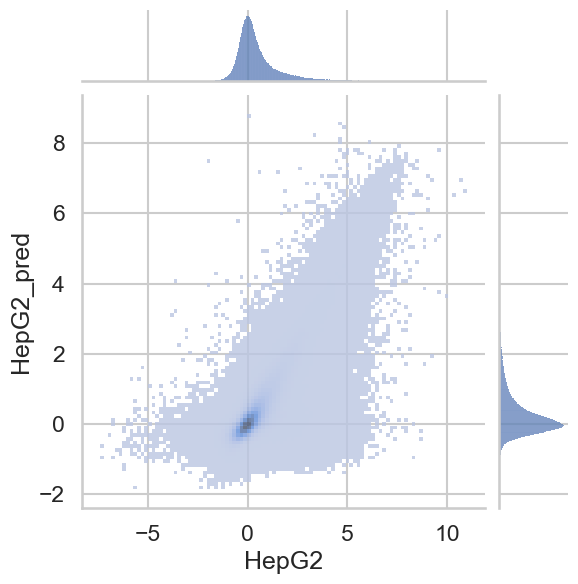

In [6]:
g = sns.jointplot(x=main_df['HepG2'], y=main_df['HepG2_pred'], kind='hist', bins=100, alpha=0.8)

In [8]:
data_split_column = 'chr'
data_split_dict = {
    'train': ['chr'+str(i) for i in range(3,23)],
    'valid': ['chr1'],
    'test': ['chr2'],
    'designed': ['chr0'],
}
data_split_index_dict = {
    data_split: main_df[data_split_column].isin(data_split_dict[data_split]) for data_split in data_split_dict
}

In [10]:
for cell_type in ['HepG2', 'K562', 'SKNSH']:
    for data_split in ['train', 'valid', 'test', 'designed']:
        print(cell_type, data_split)
        selected_index = data_split_index_dict[data_split]
        r = pearsonr(main_df[selected_index][f'{cell_type}'], main_df[selected_index][f'{cell_type}_pred'])[0]
        print('pearson r', r)
    print()

HepG2 train
pearson r 0.8981791939522863
HepG2 valid
pearson r 0.8096102791823557
HepG2 test
pearson r 0.809045886810243
HepG2 designed
pearson r 0.36620311649978676

K562 train
pearson r 0.9049358047148304
K562 valid
pearson r 0.8216568347695734
K562 test
pearson r 0.8163621646490495
K562 designed
pearson r 0.741956645652966

SKNSH train
pearson r 0.9023336038585427
SKNSH valid
pearson r 0.8192505056718793
SKNSH test
pearson r 0.8163068902653026
SKNSH designed
pearson r 0.6921210646509746



In [12]:
print('model only trained on HepG2')
for cell_type in ['HepG2', 'K562', 'SKNSH']:
    for data_split in ['train', 'valid', 'test', 'designed']:
        print(cell_type, data_split)
        selected_index = data_split_index_dict[data_split]
        r = pearsonr(main_df[selected_index][f'{cell_type}'], main_df[selected_index][f'HepG2_pred'])[0]
        print('pearson r', r)
    print()

model only trained on HepG2
HepG2 train
pearson r 0.8981791939522863
HepG2 valid
pearson r 0.8096102791823557
HepG2 test
pearson r 0.809045886810243
HepG2 designed
pearson r 0.36620311649978676

K562 train
pearson r 0.8421589403122268
K562 valid
pearson r 0.763655227714849
K562 test
pearson r 0.7600632088990029
K562 designed
pearson r 0.16215198688938984

SKNSH train
pearson r 0.8607691758980063
SKNSH valid
pearson r 0.777967868187747
SKNSH test
pearson r 0.7698768780502918
SKNSH designed
pearson r 0.3512632227893041



In [5]:
# train_chrs = ['chr'+str(i) for i in range(3,23)]
# valid_chrs = ['chr1']
# test_chrs = ['chr2']
# designed_chrs = ['chr0']

# for chrs in [train_chrs, valid_chrs, test_chrs, designed_chrs]:
#     print(chrs)
#     df = main_df[main_df['chr'].isin(chrs)]
#     for i, cell_type in enumerate(cell_types):
#         r = pearsonr(df[f'{cell_type}'], df[f'{cell_type}_pred'])[0]
#         print(f'{cell_type} pearson r = {r:.3f}')

['chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chr20', 'chr21', 'chr22']
HepG2 pearson r = 0.898
K562 pearson r = 0.905
SKNSH pearson r = 0.902
['chr1']
HepG2 pearson r = 0.810
K562 pearson r = 0.822
SKNSH pearson r = 0.819
['chr2']
HepG2 pearson r = 0.809
K562 pearson r = 0.816
SKNSH pearson r = 0.816
['chr0']
HepG2 pearson r = 0.366
K562 pearson r = 0.742
SKNSH pearson r = 0.692


In [24]:
# 降采样，选择平均表达>1的样本和等量其他样本
condition_1 = (main_df[['HepG2', 'K562', 'SKNSH']].mean(axis=1) > 1)
index_1 = main_df[condition_1].index
np.random.seed(42)
index_2 = np.random.choice(main_df[~condition_1].index, size=len(index_1), replace=False)
selected_index = np.concatenate([index_1, index_2])


main_df = main_df.iloc[selected_index]
for chrs in [train_chrs, valid_chrs, test_chrs, designed_chrs]:
    print(chrs)
    df = main_df[main_df['chr'].isin(chrs)]
    for i, cell_type in enumerate(cell_types):
        r = pearsonr(df[f'{cell_type}'], df[f'{cell_type}_pred'])[0]
        print(f'{cell_type} pearson r = {r:.3f}')

IndexError: positional indexers are out-of-bounds